In [9]:
% matplotlib inline

In [5]:
# properties

colors = 8
shapes = 12
locs = 9

props = colors + shapes + locs
configs = colors * shapes * locs
print(props, configs)

29 864


In [2]:
import math

for n in range(1, 8):
    print("situations(n_objects={}): {:>27,}".format(n, int(math.pow(configs, n))))

situations(n_objects=1):                         864
situations(n_objects=2):                     746,496
situations(n_objects=3):                 644,972,544
situations(n_objects=4):             557,256,278,016
situations(n_objects=5):         481,469,424,205,824
situations(n_objects=6):     415,989,582,513,831,936
situations(n_objects=7): 359,414,999,291,950,792,704


In [3]:
import json

task_file_path = "../tests/generated/tasks.json"


def load_tasks():
    with open(task_file_path) as f:
        return json.load(f)

In [6]:
tasks = load_tasks()

In [28]:
import collections


# Do we have a balanced distribution over property values?
# Count prop value frequencies
# Can also be seen as distribution of X
def count_prop_val_freq(tasks):
    freqs = collections.defaultdict(int)
    for task in tasks:
        for piece in task["pieces"]:
            freqs[piece["type"]] = freqs[piece["type"]] + 1
            freqs[piece["color"]] = freqs[piece["color"]] + 1
            freqs[piece["posRelBoard"]] = freqs[piece["posRelBoard"]] + 1
    return freqs


props_value_freqs = count_prop_val_freq(tasks)

In [33]:
import pandas as pd


def prop_val_to_prop(prop_val):
    if prop_val in ["red", "orange", "yellow", "green", "blue", "purple", "saddlebrown", "grey"]:
        return "color"
    if prop_val in ["F", "I", "L", "N", "P", "T", "U", "V", "W", "X", "Y", "Z"]:
        return "shape"
    return "posRelBoard"


# easier to consume for pandas as list of dicts
df_props = pd.DataFrame.from_records(
    [{"PropVal": k, "Count": v, "Prop": prop_val_to_prop(k)} for k, v in props_value_freqs.items()])

/Users/philippsadler/Opts/Apps/anaconda3/envs/golmi/lib/python3.9/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


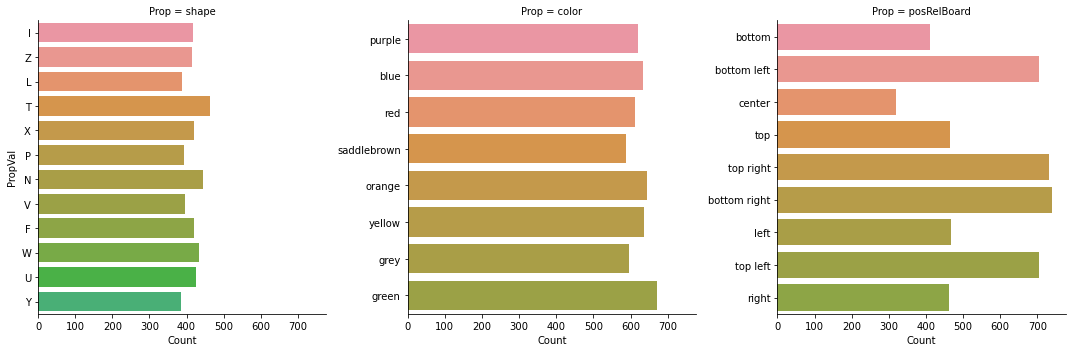

In [40]:
import seaborn as sns
# easier to plot if pandas frame
sns.catplot(x="Count", y="PropVal", col="Prop", kind="bar", data=df_props, orient="h", sharey=False)

In [ ]:
# Do we have a balanced distribution over selected targets?
# Count unique targets (based on props)
# Do we have targets for all possible (864) configs? Or at least an even amount over the existing ones?
# Can also be seen as distribution of X


In [19]:
# For a single situation we still have multiple refs
# How many distinct refs (based on included props) do we have on average?
# Can also be seen as distribution of Y (label frequencies)


In [ ]:
# The scenarios to distinguish a piece is a fix number (10):
# - by all properties together (1)
# - by one specific property of color, shape and position (3)
# - by a pair of properties color, shape and position (6)
# What is the frequency for each scenario? (Note: A sample may include multiple scenarios based on the props order)
# Here we only count the distinct scenarios.
# Can also be seen as distribution of Y (label frequencies)
